In [43]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [46]:
data = pd.read_csv('H:\Meu_Github\Dataset_Analysis\Restaurants\Future50.csv')

In [47]:
data

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [48]:
data.shape

(50, 9)

In [49]:
data.isnull().sum()

Rank           0
Restaurant     0
Location       0
Sales          0
YOY_Sales      0
Units          0
YOY_Units      0
Unit_Volume    0
Franchising    0
dtype: int64

In [50]:
data.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [51]:
data.columns = ['Rank', 'Restaurante', 'Localização', 'Vendas', "Vendas-Var%ano", 'Unidades','Unidades_Var%ano', 'Volume_unitario', 'Franchising']

In [52]:
data.head()

,Rank,Restaurante,Localização,Vendas,Vendas-Var%ano,Unidades,Unidades_Var%ano,Volume_unitario,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


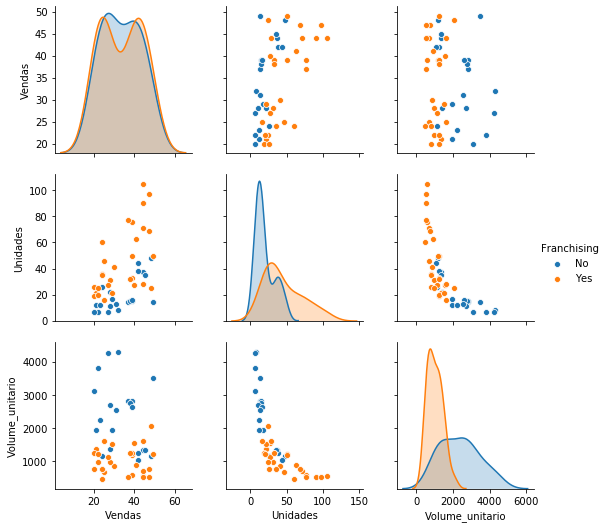

In [53]:
sns.pairplot(data[['Vendas', 'Unidades', 'Volume_unitario','Franchising']], hue='Franchising')

In [54]:
fr = data.groupby('Franchising').sum()
fr

,Rank,Vendas,Unidades,Volume_unitario
Franchising,,,,
No,614,708,418,49995
Yes,661,981,1317,29635


In [55]:
fr.Unidades

Franchising
No      418
Yes    1317
Name: Unidades, dtype: int64

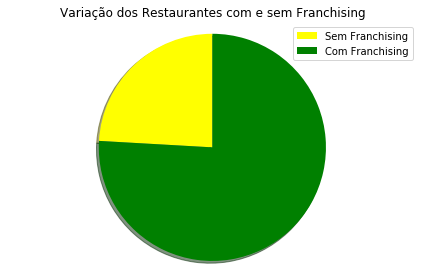

In [56]:
labels = ('Sem Franchising','Com Franchising')
sizes = fr.Unidades
colors = ['yellow', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.title('Variação dos Restaurantes com e sem Franchising')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [57]:
df2 = data.groupby("Unidades")["Restaurante"].sum()
df2

Unidades
7      Hawkers Asian Street FareBoqueriaCulinary Dropout
8                                        Bulla Gastrobar
11                       Spitz Mediterranean Street Food
12                      Original ChopShopThe Little Beet
13                                       StoneFire Grill
14                         By ChloeBlue Sushi Sake Grill
15                     Sugarfire SmokehouseCondado Tacos
16                       Tacos 4 LifeSuper Duper Burgers
17                                  Joella's Hot Chicken
19                                             Melt Shop
20                                             Surcheros
21                       SlapfishThe Flying Biscuit Cafe
22                                    Dos Toros Taqueria
25                  Quickway Japanese HibachiLA Crawfish
26                              EvergreensThe Lost Cajun
27                        The Pizza PressFamous Toastery
28                      Gus's World Famous Fried Chicken
31                    

In [58]:
d2 = data[['Restaurante', 'Unidades','Vendas']].sort_values('Unidades', ascending = True)
d2

,Restaurante,Unidades,Vendas
37,Culinary Dropout,7,20
18,Hawkers Asian Street Fare,7,22
33,Boqueria,7,27
20,Bulla Gastrobar,8,32
42,Spitz Mediterranean Street Food,11,28
14,Original ChopShop,12,21
22,The Little Beet,12,23
48,StoneFire Grill,13,31
40,Blue Sushi Sake Grill,14,49
24,By Chloe,14,37


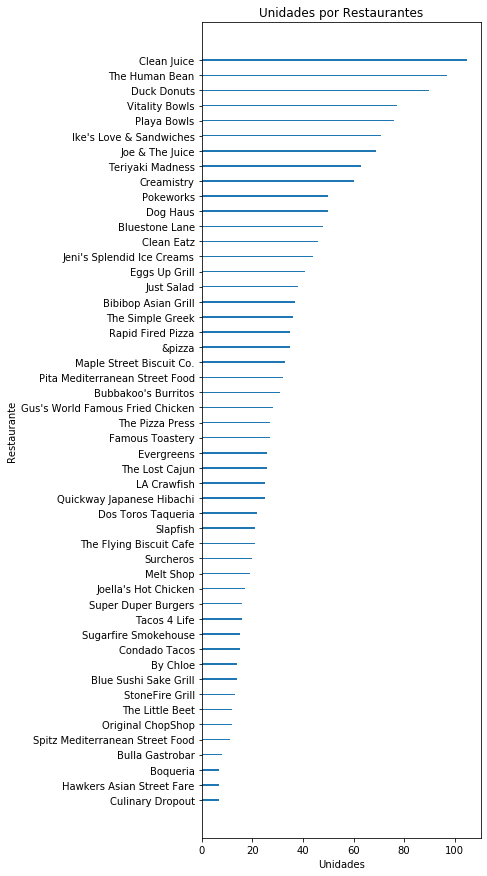

In [59]:
plt.figure(figsize=(5,15))
plt.barh(d2.Restaurante, d2.Unidades, height = 0.1)
plt.title('Unidades por Restaurantes')
plt.ylabel('Restaurante')
plt.xlabel('Unidades')
plt.show()

In [60]:
d3 = data[['Restaurante', 'Unidades','Vendas']].sort_values('Vendas', ascending = True)

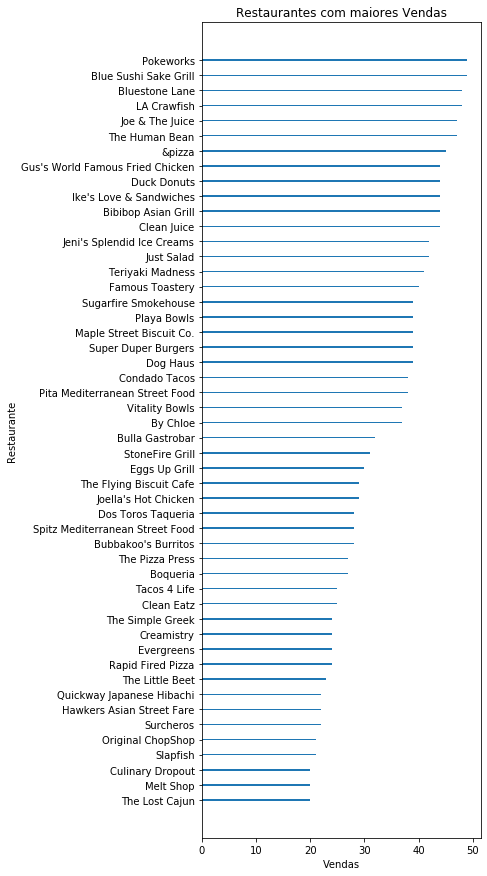

In [61]:
plt.figure(figsize=(5,15))
plt.barh(d3.Restaurante, d3.Vendas, height = 0.1)
plt.title('Restaurantes com maiores Vendas')
plt.ylabel('Restaurante')
plt.xlabel('Vendas')
plt.show()
# plt.savefig("restaurantes.pdf", format="pdf")

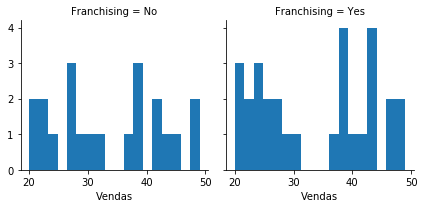

In [62]:
g = sns.FacetGrid(data, col='Franchising')
g.map(plt.hist, 'Vendas', bins=18)

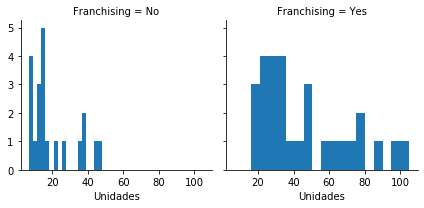

In [63]:
g = sns.FacetGrid(data, col='Franchising')
g.map(plt.hist, 'Unidades', bins=18)

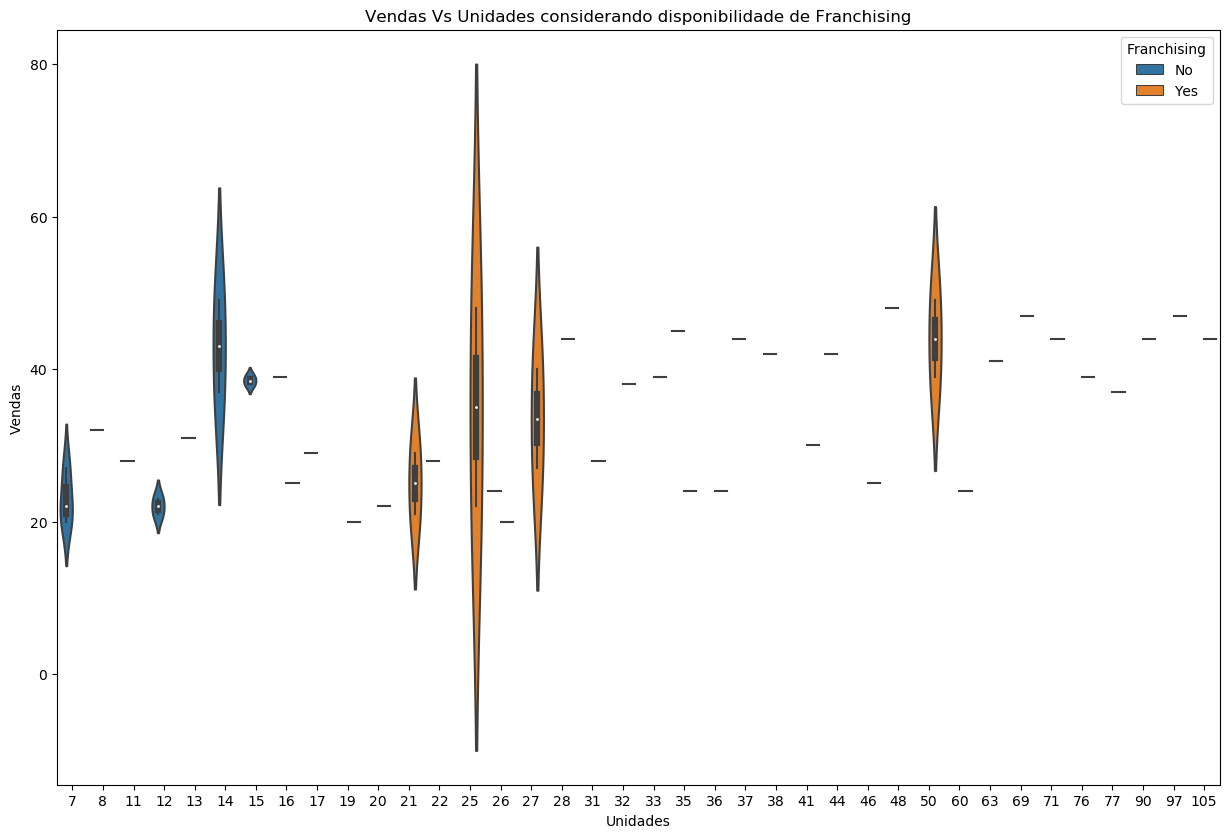

In [64]:
plt.figure(figsize=(15,10), dpi=100)
plt.title('Vendas Vs Unidades considerando disponibilidade de Franchising')
sns.violinplot(x='Unidades',y='Vendas', hue='Franchising', data=data)

In [65]:
data['Estado'] = data['Localização'].str.split(',').str[1]

In [66]:
data

,Rank,Restaurante,Localização,Vendas,Vendas-Var%ano,Unidades,Unidades_Var%ano,Volume_unitario,Franchising,Estado
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,Wash.
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,N.C.
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,Calif.
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,N.C.
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,Calif.
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes,N.J.
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes,Pa.
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes,N.Y.
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes,Calif.
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No,Ky.


In [67]:
Estado = data.groupby("Estado").mean()

In [68]:
Estado

,Rank,Vendas,Unidades,Volume_unitario
Estado,,,,
Calif.,9.000000,24.000000,60.000000,465.000000
N.J.,6.000000,39.000000,76.000000,580.000000
Ariz.,38.000000,20.000000,7.000000,3120.000000
Ark.,44.000000,25.000000,16.000000,1620.000000
Calif.,25.000000,35.000000,37.333333,1558.333333
Colo.,13.000000,41.000000,63.000000,890.000000
D.C.,47.000000,45.000000,35.000000,1350.000000
Fla.,20.000000,31.000000,16.000000,3120.000000
Ga.,40.333333,29.666667,24.333333,1333.333333


In [69]:
Estado = Estado.reset_index()

In [70]:
Estado.insert(0, 'Seq', range(0, 0 + len(Estado)))

In [71]:
Estado = Estado.drop(columns=['Seq'])

In [73]:
Estado

,Estado,Rank,Vendas,Unidades,Volume_unitario
0,Calif.,9.000000,24.000000,60.000000,465.000000
1,N.J.,6.000000,39.000000,76.000000,580.000000
2,Ariz.,38.000000,20.000000,7.000000,3120.000000
3,Ark.,44.000000,25.000000,16.000000,1620.000000
4,Calif.,25.000000,35.000000,37.333333,1558.333333
5,Colo.,13.000000,41.000000,63.000000,890.000000
6,D.C.,47.000000,45.000000,35.000000,1350.000000
7,Fla.,20.000000,31.000000,16.000000,3120.000000
8,Ga.,40.333333,29.666667,24.333333,1333.333333
9,Ky.,10.000000,29.000000,17.000000,1930.000000


In [75]:
Estado.loc[0, 'Estado'] =  'CA'
Estado.loc[1, 'Estado'] =  'NJ'
Estado.loc[2, 'Estado'] =  'AZ'
Estado.loc[3, 'Estado'] =  'AR'
Estado.loc[4, 'Estado'] =  'CA'
Estado.loc[5, 'Estado'] =  'CO'
Estado.loc[6, 'Estado'] =  'WA'
Estado.loc[7, 'Estado'] =  'FL'
Estado.loc[8, 'Estado'] =  'GA'
Estado.loc[9, 'Estado'] =  'KY'
Estado.loc[10, 'Estado'] =  'MO'
Estado.loc[11, 'Estado'] =  'NC'
Estado.loc[12, 'Estado'] =  'NJ'
Estado.loc[13, 'Estado'] =  'NY'
Estado.loc[14, 'Estado'] =  'NE'
Estado.loc[15, 'Estado'] =  'OH'
Estado.loc[16, 'Estado'] =  'OR'
Estado.loc[17, 'Estado'] =  'PA'
Estado.loc[18, 'Estado'] =   'SC'
Estado.loc[19, 'Estado'] =   'TN'
Estado.loc[20, 'Estado'] =   'TX'
Estado.loc[21, 'Estado'] =   'VA'
Estado.loc[22, 'Estado'] =   'WA'

In [76]:
Estado = Estado.groupby(['Estado']).sum()

In [77]:
Estado

,Rank,Vendas,Unidades,Volume_unitario
Estado,,,,
AR,44.000000,25.000000,16.000000,1620.000000
AZ,38.000000,20.000000,7.000000,3120.000000
CA,34.000000,59.000000,97.333333,2023.333333
CO,13.000000,41.000000,63.000000,890.000000
FL,20.000000,31.000000,16.000000,3120.000000
GA,40.333333,29.666667,24.333333,1333.333333
KY,10.000000,29.000000,17.000000,1930.000000
MO,26.000000,39.000000,15.000000,2820.000000
NC,14.333333,36.333333,59.333333,928.333333


In [78]:
Estado.shape

(20, 4)

In [79]:
Estado = Estado.reset_index()
Estado

,Estado,Rank,Vendas,Unidades,Volume_unitario
0,AR,44.000000,25.000000,16.000000,1620.000000
1,AZ,38.000000,20.000000,7.000000,3120.000000
2,CA,34.000000,59.000000,97.333333,2023.333333
3,CO,13.000000,41.000000,63.000000,890.000000
4,FL,20.000000,31.000000,16.000000,3120.000000
5,GA,40.333333,29.666667,24.333333,1333.333333
6,KY,10.000000,29.000000,17.000000,1930.000000
7,MO,26.000000,39.000000,15.000000,2820.000000
8,NC,14.333333,36.333333,59.333333,928.333333
9,NE,41.000000,49.000000,14.000000,3500.000000


No handles with labels found to put in legend.


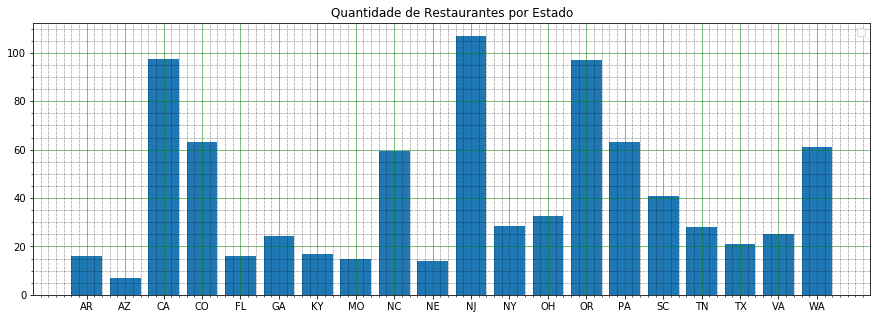

In [80]:
# Turn on the grid
plt.figure(figsize=(15,5))
plt.title('Quantidade de Restaurantes por Estado')
plt.bar(Estado.Estado, Estado.Unidades)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green', label=Estado['Estado'])
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()

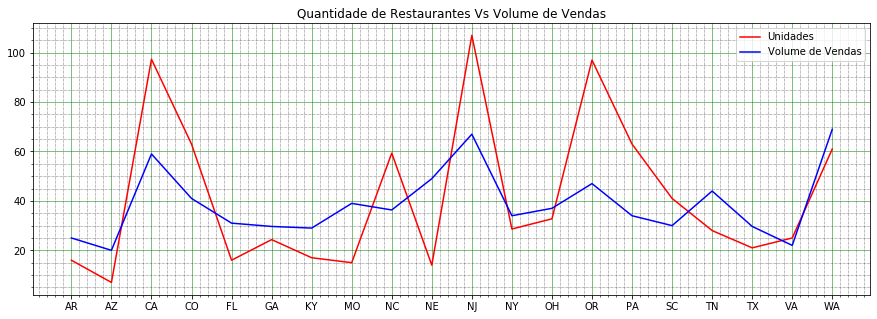

In [81]:
# Turn on the grid
plt.figure(figsize=(15,5))
plt.title('Quantidade de Restaurantes Vs Volume de Vendas')
plt.plot(Estado.Estado, Estado.Unidades, color= 'red', label='Unidades')
plt.plot(Estado.Estado, Estado.Vendas, color = 'blue', label='Volume de Vendas')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green', label=Estado['Estado'])
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()

In [84]:
import plotly as py
import plotly.graph_objs as go
fig = go.Figure(data=go.Choropleth(
locations=Estado['Estado'], # Nome do país
z = Estado['Unidades'].astype(int), # Dados para o Choropleth
locationmode = 'USA-states', # Tipo de identificção geográfica
colorscale = 'Reds', #escala contínua em tons de vermelho
colorbar_title = "Unidades",
))
fig.update_layout(
title_text = 'Restaurantes nos USA',
geo_scope='north america', # Limita escopo para a América do Sul
)
fig.show()